In [9]:
#breast cancer
#RA2111026010508
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Dataset shape:", X.shape)
print("Feature names:", breast_cancer.feature_names)

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nMean of each feature after scaling:\n", X_scaled.mean(axis=0))
print("\nStandard deviation of each feature after scaling:\n", X_scaled.std(axis=0))


Mean of each feature after scaling:
 [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]

Standard deviation of each feature after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
cov_matrix = np.cov(X_scaled.T)

print("\nCovariance matrix:\n", cov_matrix)


Covariance matrix:
 [[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1

In [20]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)



Eigenvalues:
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]

Eigenvectors:
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

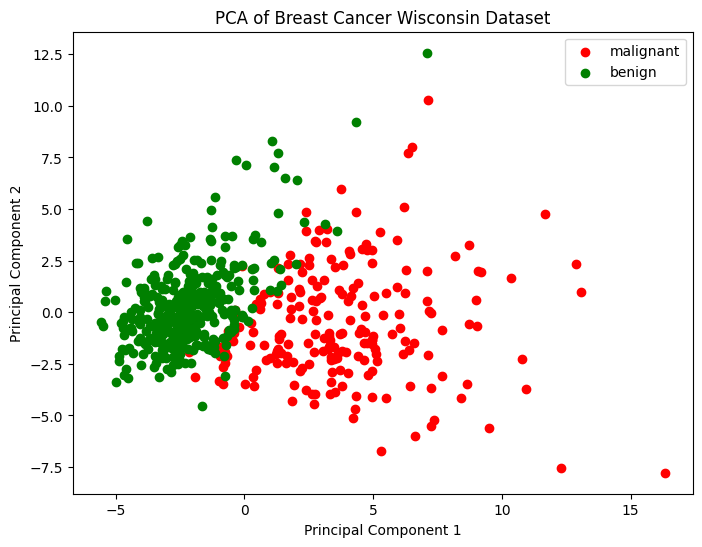

In [15]:
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = y == target
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], c=color, label=breast_cancer.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Wisconsin Dataset')
plt.legend()
plt.show()

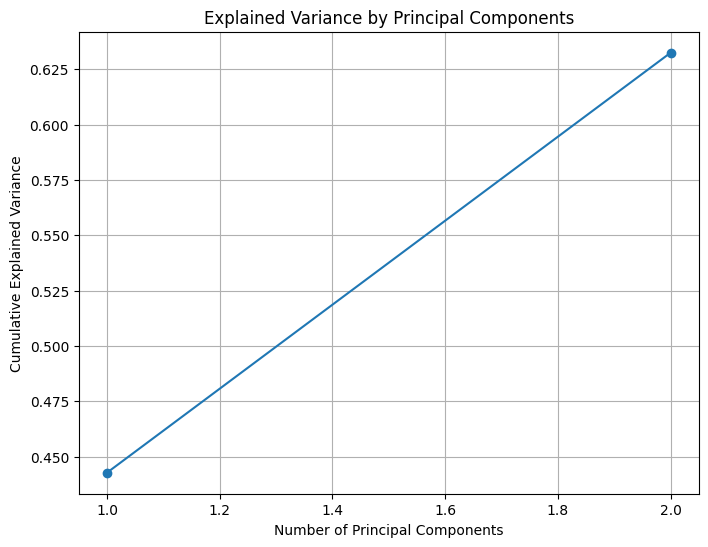

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
